# Fashion MNIST

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Flatten, Dense
from keras.models import Sequential
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
import random
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator


2025-02-20 12:28:27.171410: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-20 12:28:27.176655: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-20 12:28:27.226245: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-20 12:28:27.273375: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740072507.322100    9643 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740072507.33

In [2]:
# Load MNIST dataset
mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(10000, 28, 28, 1).astype('float32') / 255.0

Here are the names of the 10 classes

In [3]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Things to do:
*  Plot a histogram of the class labels to determine balance
*  Plot some random entries from the dataset and their class name
*  Create a DNN based on the MNIST one we made. Use any topology and activation functions you want.
*  When you 'compile' the model, include `metrics=['accuracy']`
*  Train the model
*  Plot the accuracies using the plot code below
*  Evaluate the model on the **test** set and report the result
*  Repeat the last 5 steps -- try to get the best test accuracy
*  Print a confusion matrix (10x10) for the test set
*  Make a grid showing a selection of the misclassified samples, along with their label (probably need to google this)

## Training the model

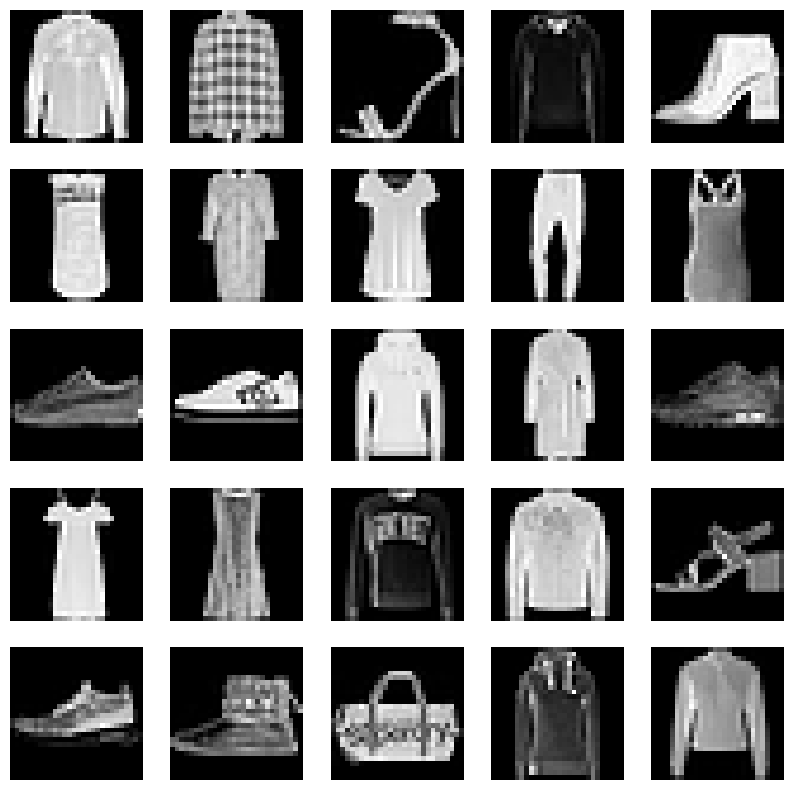

In [4]:

# Select 25 random images
num_images = 25
indices = np.random.choice(x_train.shape[0], num_images, replace=False)
selected_images = x_train[indices]

# Plot the 5x5 grid
fig, axes = plt.subplots(5, 5, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(selected_images[i], cmap='gray')  # Display in grayscale
    ax.axis('off')  # Hide axis

plt.show()

2025-02-20 12:28:31.519956: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


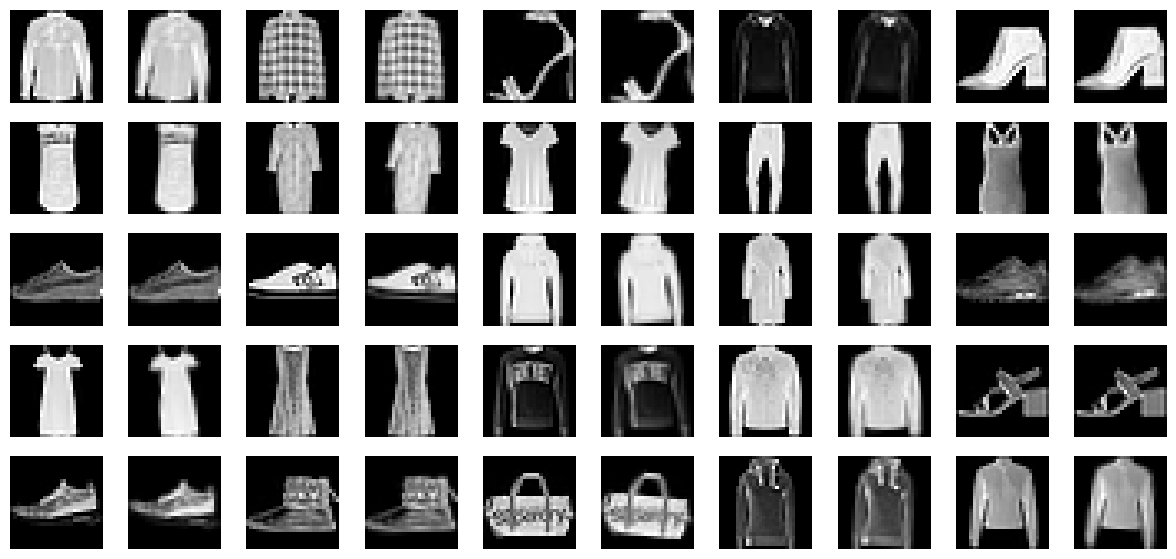

In [5]:

# Define the random rotation layer
random_rotation = tf.keras.layers.RandomRotation(factor=0.02)  # Rotate by ±2% of 180 degrees

# Apply the rotation (expand dimensions to match expected input shape)
rotated_images = random_rotation(selected_images)

# Plot the original and rotated images side by side
fig, axes = plt.subplots(5, 10, figsize=(15, 7))

for i in range(5):
    for j in range(5):
        idx = i * 5 + j

        # Plot original
        axes[i, j * 2].imshow(selected_images[idx], cmap='gray')
        axes[i, j * 2].axis('off')

        # Plot rotated
        axes[i, j * 2 + 1].imshow(tf.squeeze(rotated_images[idx]), cmap='gray')
        axes[i, j * 2 + 1].axis('off')

plt.show()

In [6]:
# extra code – clear the session to reset the name counters
tf.keras.backend.clear_session()

model = tf.keras.Sequential([
    tf.keras.layers.Input([28,28]),
    tf.keras.layers.RandomRotation(0.02),
    tf.keras.layers.Flatten(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(512, activation="relu", kernel_regularizer=regularizers.l2(1e-3)),
    tf.keras.layers.Dropout(0.05),
    tf.keras.layers.Dense(200, activation="relu"),
    tf.keras.layers.Dropout(0.05),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [7]:
model.compile(metrics=['accuracy'], loss='sparse_categorical_crossentropy')

In [8]:
history = model.fit(x_train, y_train, batch_size=1024, epochs=15, validation_split=0.1)

Epoch 1/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.3213 - loss: 2.5190 - val_accuracy: 0.6448 - val_loss: 1.8718
Epoch 2/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.4843 - loss: 1.9642 - val_accuracy: 0.6862 - val_loss: 1.7686
Epoch 3/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.4816 - loss: 1.9047 - val_accuracy: 0.7538 - val_loss: 1.2559
Epoch 4/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.4331 - loss: 1.9754 - val_accuracy: 0.7553 - val_loss: 1.0362
Epoch 5/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.4506 - loss: 1.8540 - val_accuracy: 0.7685 - val_loss: 0.9653
Epoch 6/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.4596 - loss: 1.7925 - val_accuracy: 0.7847 - val_loss: 0.9094
Epoch 7/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.4671 - loss: 1.7595 - val_accuracy: 0.7902 - val_loss: 0.8587
Epoch 8/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.5279 - loss: 1.5323 - val_accuracy: 0.7830 - v

In [9]:
np.argmax(model.predict(selected_images),axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


array([4, 6, 5, 6, 9, 3, 3, 3, 1, 0, 7, 7, 2, 4, 7, 3, 3, 2, 4, 5, 7, 9,
       8, 2, 4])

In [10]:
y_train[indices]

array([6, 6, 5, 2, 9, 3, 3, 0, 1, 0, 7, 7, 2, 4, 7, 3, 3, 2, 4, 5, 7, 9,
       8, 2, 4], dtype=uint8)

## Plotting the Results

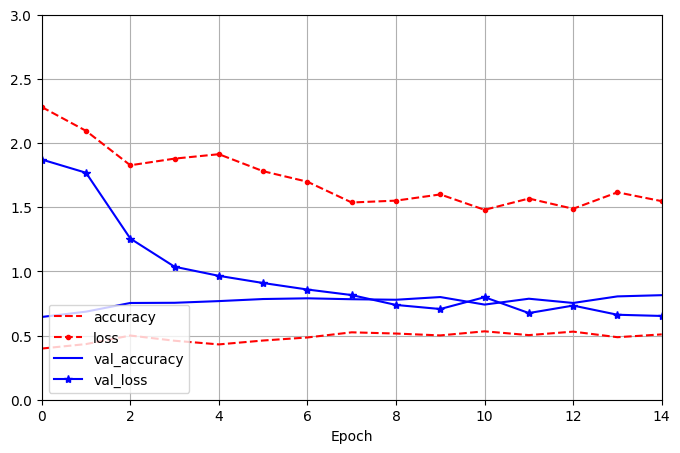

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 14], ylim=[0, 3], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")  # extra code
plt.show()

In [12]:
y_prob = model.predict(x_test)
y_pred = np.argmax(y_prob, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8079

## Display your model

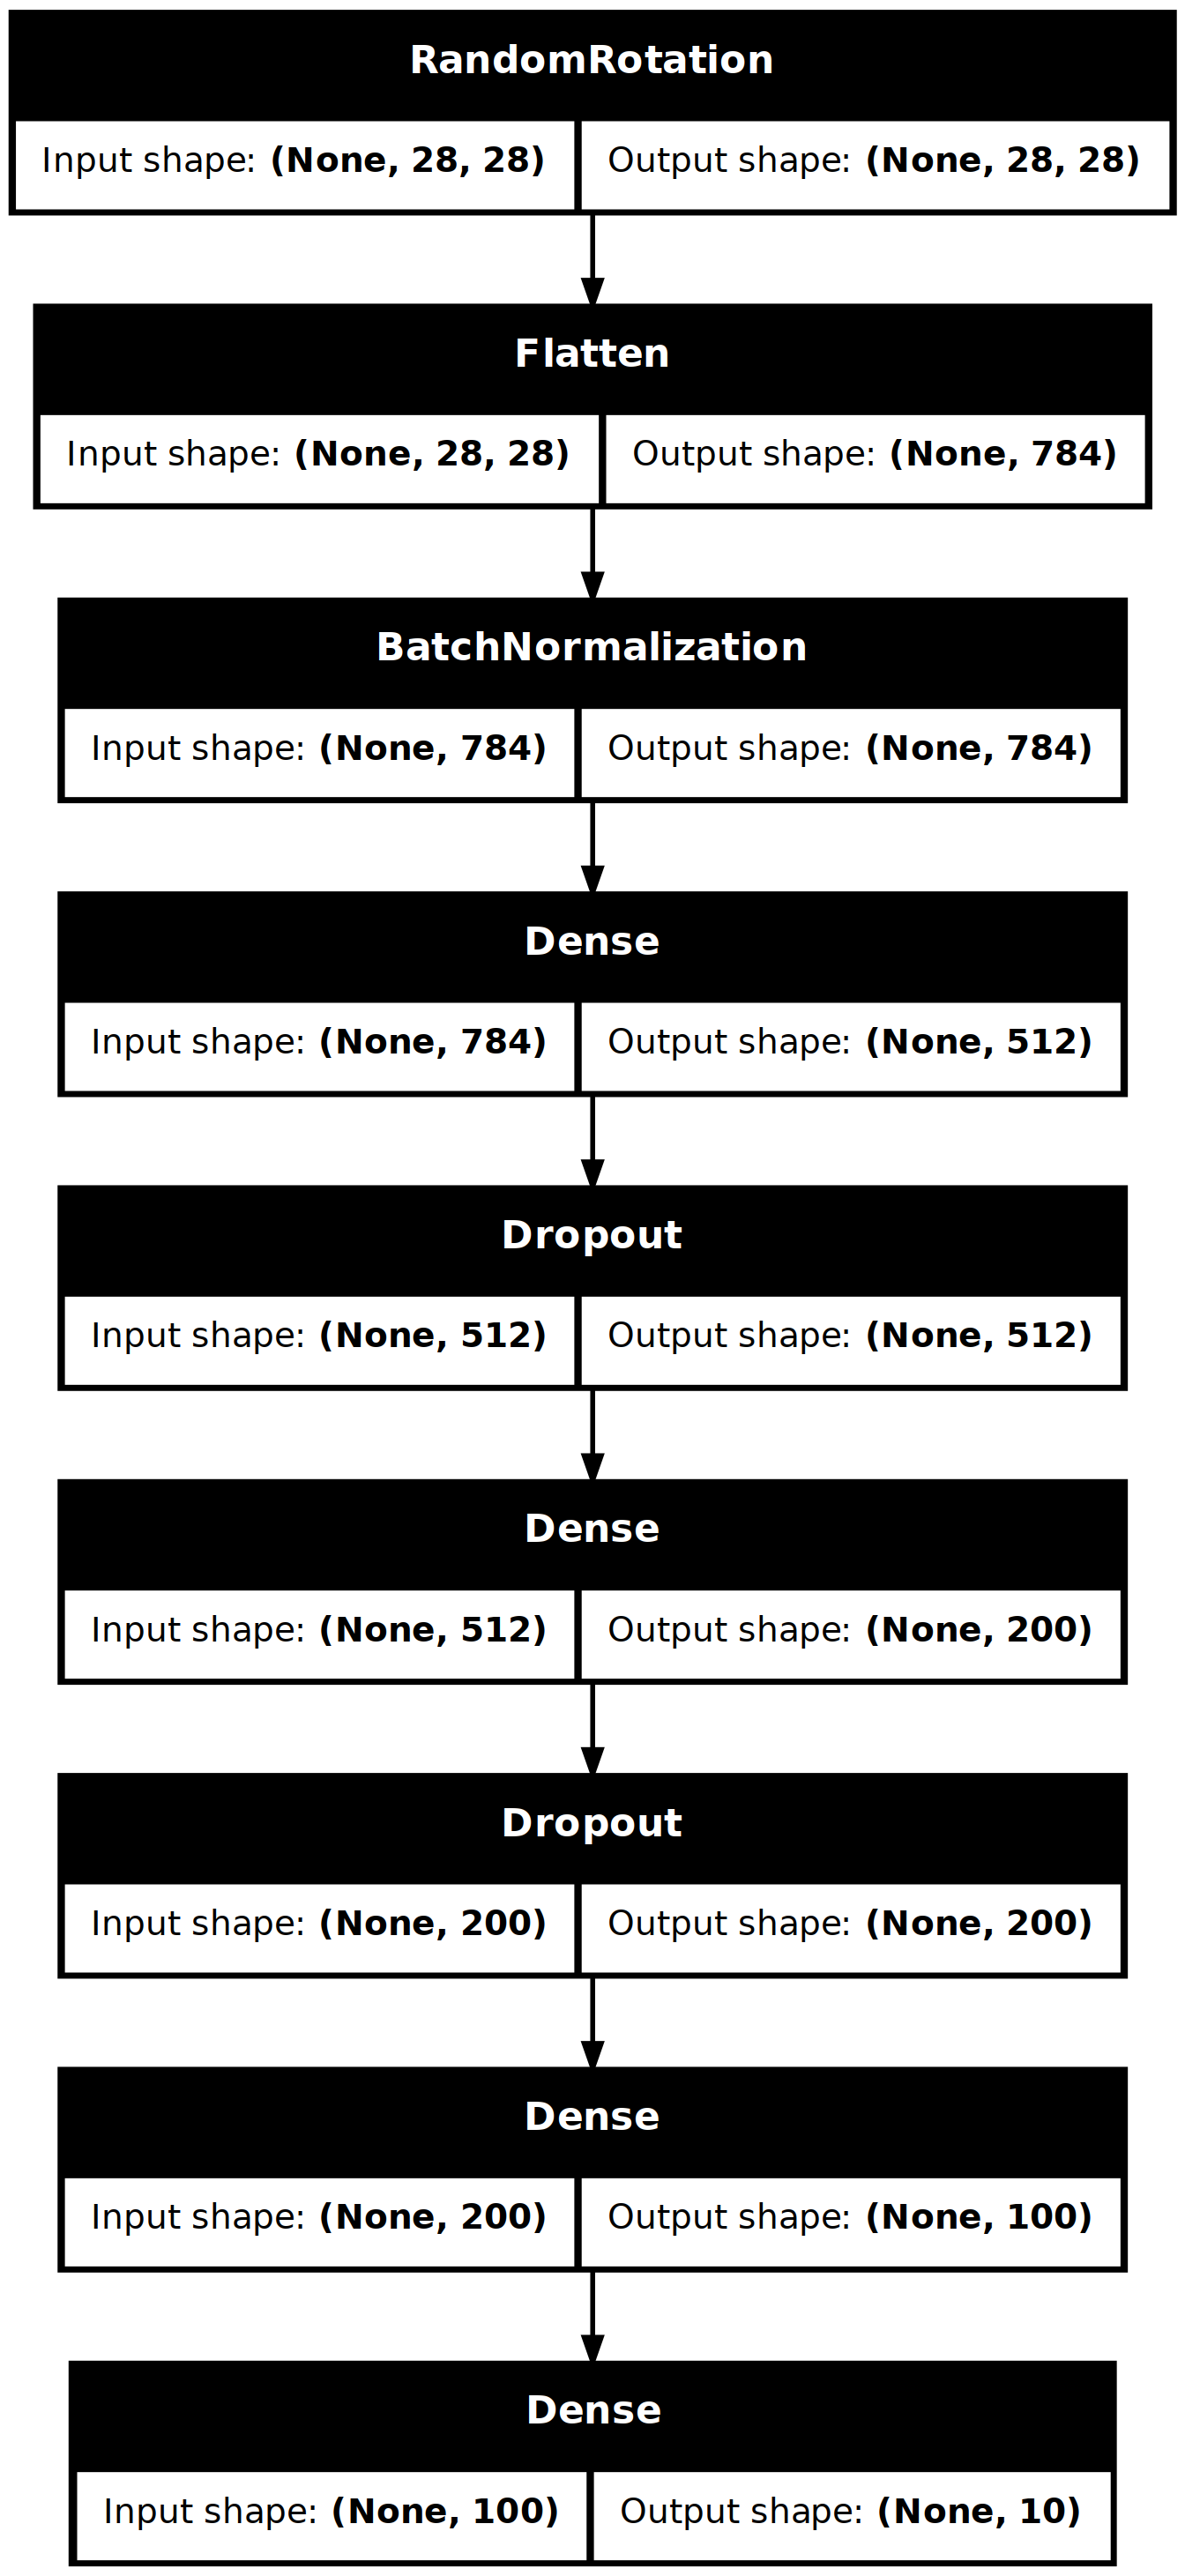

In [14]:
tf.keras.utils.plot_model(model, "Fashion-Mnist.png", show_shapes=True)

## A selection of misclassified samples

In [15]:
# your code

## Fine Tuning

In [16]:
!pip install keras-tuner


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [17]:
import keras_tuner as kt

In [18]:
def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value = 2, max_value = 6, default = 3)
    n_neurons = hp.Int("n_neurons", min_value = 32, max_value = 256)
    n_dropouts = hp.Int("n_dropouts", min_value = 2, max_value = 25)
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input([28,28]))
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="selu"))
        model.add(tf.keras.layers.Dropout(n_dropouts/100))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
    return model

In [19]:
random_search_tuner = kt.RandomSearch(
    build_model, objective='val_accuracy', max_trials=10, overwrite=True,
    directory="fashion_mnist", project_name="search", seed=42)

In [20]:
random_search_tuner.search(x_train, y_train, epochs=15, validation_split=0.1)

Trial 10 Complete [00h 01m 59s]
val_accuracy: 0.8806666731834412

Best val_accuracy So Far: 0.8893333077430725
Total elapsed time: 00h 13m 14s
